In [0]:
!pip install Pillow # used to resize images

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import random
import shutil
import time

from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


## Notebook one: Download and preprocess the COCO training images
Create a new notebook for this part of the assignment.

In this section, you will download your starter CSV and the COCO training images. Preprocess the +/- 40,000 images from the starter CSV (by resizing them to 299x299 using Pillow), and create a zip file called "thumbnails.zip". Your zip should be around 500MB. 

Finally, upload your "thumbnails.zip" to the Cloud, so you can easily download it in your second notebook.

### Tips

I recommend downloading the COCO images with curl, so you can resume your download if it is [interrupted](https://stackoverflow.com/questions/19728930/how-to-resume-interrupted-download-automatically-in-curl) or stalls.

In Colab (or on Linux / Mac):

```
$ curl -L -O your_url
```

You can download these images in Colab, but you may need to be mindful of disk usage. As a tip to save disk space, after unzipping them, you may delete any images from the zip not referenced in the starter code.

After you've downloaded them with curl, here's a command  you can use to unzip them:

```
$ unzip -q from_zip -d to_folder
```

Also note: there are so many images that opening the folder in the Colab will be slow. Instead of opening the folder with the UI, you can use these shell commands to explore it:

```
$ ls -lha
$ du -sh
```

### Download the starter CSV

In [0]:
# Starter code to download small files
# Use this to download your starter CSV in notebook one and two.
# Also use it to download your thumbnails.zip in notebook two.
def download_if_missing(url, target, extract=True):
  if os.path.exists(target):
    return target
  return tf.keras.utils.get_file(target, origin=url, extract=extract)

In [0]:
colab_root = "/content/"

In [0]:
csv_path = os.path.join(colab_root, "starter.csv")
download_if_missing("https://storage.googleapis.com/applied-dl/mini-vqa/starter.csv",
                     csv_path)

9084928/9078552 [==============================] - 0s 0us/step


'/content/starter.csv'

Tip. Here are a few shell commands you can use to quickly inspect the CSV and familiarize yourself with the format.

In [0]:
!head $csv_path -n3 # take a look at a few rows

is the sky blue,yes,COCO_train2014_000000393221.jpg
is there snow on the mountains,yes,COCO_train2014_000000393221.jpg
is the window open,yes,COCO_train2014_000000393223.jpg


In [0]:
!wc -l $csv_path

140637 /content/starter.csv


### Download the COCO training images with curl

In [0]:
# Your code here
# Download the training images with curl, and unzip them.
# If you're working in Colab, be mindful of disk usage.
!curl -L -O images.cocodataset.org/zips/train2014.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.5G  100 12.5G    0     0  3856k      0  0:57:01  0:57:01 --:--:-- 16.5M


In [0]:
!unzip -q train2014.zip -d train2014

### Get to know your data.
Write code to display a few images, questions, and answers.

In [0]:
!pwd

/content


In [0]:
%cd train2014/train2014

/content/train2014/train2014


In [0]:
!ls

In [0]:
!ls -lha
!du -sh

In [0]:
%cd ..

In [0]:
%cd ..

/content


(106469, question    is there any treats for the birds
answer                                    yes
image         COCO_train2014_000000359635.jpg
Name: 106469, dtype: object)


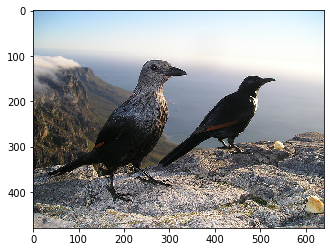

(106470, question    are the animals shown in their natural habitat
answer                                                 yes
image                      COCO_train2014_000000359635.jpg
Name: 106470, dtype: object)


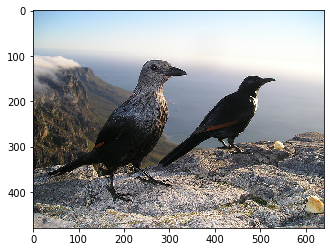

(90077, question          is the train on the track
answer                                  yes
image       COCO_train2014_000000081799.jpg
Name: 90077, dtype: object)


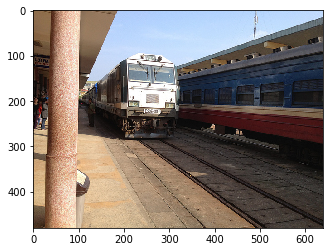

(90078, question    does the nearby column show evidence of an oxi...
answer                                                    yes
image                         COCO_train2014_000000081799.jpg
Name: 90078, dtype: object)


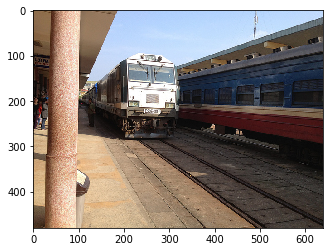

(19751, question          is the dog getting a bath
answer                                  yes
image       COCO_train2014_000000411063.jpg
Name: 19751, dtype: object)


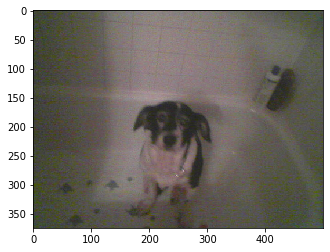

(19752, question        is the dog wearing a collar
answer                                  yes
image       COCO_train2014_000000411063.jpg
Name: 19752, dtype: object)


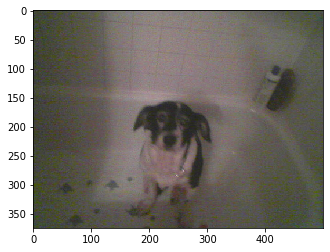

(19753, question                  is this a bulldog
answer                                   no
image       COCO_train2014_000000411063.jpg
Name: 19753, dtype: object)


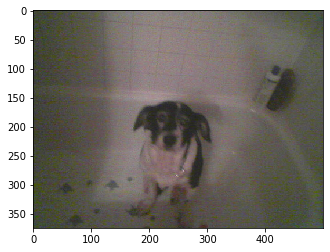

(95618, question        is the tie easy to overlook
answer                                   no
image       COCO_train2014_000000480469.jpg
Name: 95618, dtype: object)


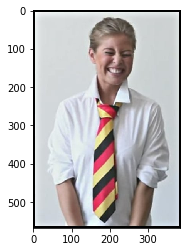

(95619, question                is the girl smiling
answer                                  yes
image       COCO_train2014_000000480469.jpg
Name: 95619, dtype: object)


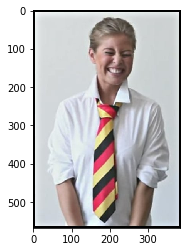

(95620, question                 is it a skinny tie
answer                                   no
image       COCO_train2014_000000480469.jpg
Name: 95620, dtype: object)


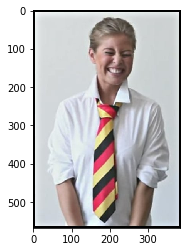

(95621, question    is the girl wearing a button up shirt
answer                                        yes
image             COCO_train2014_000000480469.jpg
Name: 95621, dtype: object)


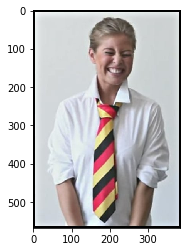

In [0]:
# Your code here
# Next, familiarze yourself with the data. 
# Add code to display a few images from the training set using matplotlib,
# and their corresponding questions and answers from the starter CSV.
# Don't trust that your data is perfect (any bugs are unintentional 
# on my part, but there may well be some). The time you spend poking
# around with it is always a good investment.
import pandas as pd
image_exp = os.listdir('/content/train2014/train2014/')[:5]
table = pd.read_csv("starter.csv", names=['question','answer','image'])
for name in image_exp:
    for row in table.iterrows():
        if name in row[1]['image']:
            print(row)
            img = mpimg.imread('/content/train2014/train2014/' + name)
            imgplot = plt.imshow(img)
            plt.show()

### As a sanity check, verify you can locate all the images
Write code to verfy you can find every image mentioned in your starter CSV (in the unzipped COCO images).

In [0]:
# Your code here
# Next, write code to verfy you can find every image mentioned in the starter 
# CSV on disk. For example, you may want write a loop like this:
# import csv
# with open('starter.csv') as myfile:
#    reader = csv.reader(myfile, delimiter=',')
#    for row in reader:
#       question, answer, image = row
#       image = image.strip()
#       assert os.path.exists(os.path.join(coco_images_folder, image))

In [0]:
# Your code here
import csv
with open('starter.csv') as myfile:
   reader = csv.reader(myfile, delimiter=',')
   for row in reader:
      question, answer, image = row
      image = image.strip()
      assert os.path.exists(os.path.join('/content/train2014/train2014/', image))

### Resize the images to 299x299
Next, resize the images referenced in starter CSV to 299x299 using Pillow.

### Tips
Here is code you can use to create a thumbnail of an image.

```
size = 299, 299
im = Image.open(path_to_image)
im.thumbnail(size)
out_file = os.path.join(your_directory, image_name)
im.save(out_file, "JPEG")
```

Note: do not change the image names when saving (your rezied image names should exactly match the names in the starter code).

In [0]:
# Your code here
# Resize all the images in the starter CSV to 299x299.
# Display a few and make sure the resize is working as expected.

# I create a new directory to save the resized images, the code is the following line.
os.makedirs('/content/thumbnails/')
for row in table.iterrows():
    image_name = row[1]['image'].strip()
    size = 299, 299
    im = Image.open('/content/train2014/train2014/'+ image_name)
    im.thumbnail(size)
    out_file = os.path.join('/content/thumbnails/', image_name)
    im.save(out_file, "JPEG")

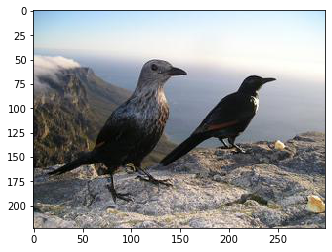

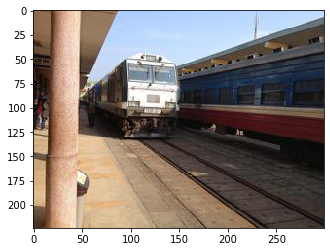

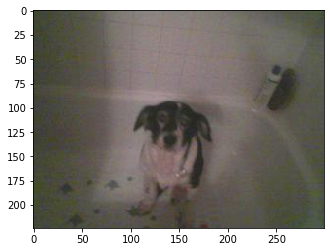

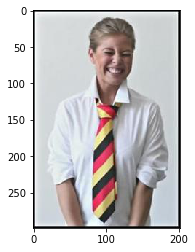

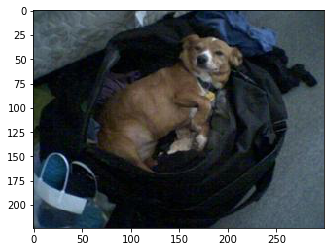

In [0]:
image_exp2 = os.listdir('/content/thumbnails/')[:5]
for name in image_exp2:
    img = mpimg.imread('/content/thumbnails/' + name)
    imgplot = plt.imshow(img)
    plt.show()

In [0]:
!pwd

/content


In [0]:
%cd thumbnails/

/content/thumbnails


In [0]:
!ls
!du -sh

In [0]:
%cd ..

/content


In [0]:
# Your code here
# Delete all images not mentioned in the starter CSV.
# As before (as a sanity check) make sure you can still locate every image 
# (now resized) mentioned in your starter CSV.
# Your code here
# Make sure your image folder contains only the images mentioned in your starter CSV.
import csv
with open('starter.csv') as myfile:
   reader = csv.reader(myfile, delimiter=',')
   for row in reader:
      question, answer, image = row
      image = image.strip()
      assert os.path.exists(os.path.join('/content/thumbnails/', image))


In [0]:
# I delete the unneccessary images anyway although I created another folder for resized images
all_images = os.listdir('/content/train2014/train2014/')
for row in table.iterrows():
    for name in all_images:
        if name not in row[1]['image']:
            try:
                os.remove('/content/train2014/train2014/' + name)
                print("remove file:" + name)
            except:
                pass

remove file:COCO_train2014_000000393221.jpg


### Create a zip of your resized images

### Tips
Here is code you can use to zip a directory, creating a new zip file "thumbnails.zip"

```
shutil.make_archive('thumbnails', 'zip', [directory_to_zip])
```

In [0]:
# Your code here
# Create a thumbnails.zip
# Verify the size is around 500MB
shutil.make_archive('thumbnails', 'zip', '/content/thumbnails/')

'/content/thumbnails.zip'

In [0]:
!du -sh thumbnails.zip

531M	thumbnails.zip


### Upload your thumbnails.zip to the Cloud

You want to host your thumbnails.zip file at a URL, for example: ```https://storage.googleapis.com/[your_bucket_name]/thumbnails.zip```, so you can easily download it in your second notebook.

You can use either your Columbia account, or any Cloud provider.
Google Cloud [storage buckets](https://cloud.google.com/storage/docs/creating-buckets) are fine for this. You can use the [free tier](https://cloud.google.com/free/).

After this is done, you're ready to start on notebook two.

In [0]:
from google.colab import auth

auth.authenticate_user()

In [0]:
project_id = 'my-nlp-project'
bucket_name = 'applied-deep-learning-sh'
!gcloud config set project {project_id}
!gsutil cp  ./thumbnails.zip gs://applied-deep-learning-sh/thumbnails.zip

Updated property [core/project].
Copying file://./thumbnails.zip [Content-Type=application/zip]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

-
Operation completed over 1 objects/530.7 MiB.                                    


In [0]:
!gsutil -m acl set -R -a public-read gs://applied-deep-learning-sh

Setting ACL on gs://applied-deep-learning-sh/thumbnails.zip#1573689701425902...
/ [1/1 objects] 100% Done                                                       
Operation completed over 1 objects.                                              
